In [1]:
# Loading in the frequently used packages

import numpy as np
import pandas as pd
import csv as csv
import matplotlib.pyplot as plt

import seaborn as sns
import re
import time
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

In [2]:
# Loading in the data sets

bed1_rent = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Housing market\Housing_Market-master\Data\Rental income monthly\Zip_MedianRentalPrice_1Bedroom.csv')
bed2_rent = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Housing market\Housing_Market-master\Data\Rental income monthly\Zip_MedianRentalPrice_2Bedroom.csv')
bed3_rent = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Housing market\Housing_Market-master\Data\Rental income monthly\Zip_MedianRentalPrice_3Bedroom.csv')
bed4_rent = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Housing market\Housing_Market-master\Data\Rental income monthly\Zip_MedianRentalPrice_4Bedroom.csv')
bed5_rent = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Housing market\Housing_Market-master\Data\Rental income monthly\Zip_MedianRentalPrice_5BedroomOrMore.csv')

bed1_value = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Housing market\Housing_Market-master\Data\Home prices\Zip_Zhvi_1bedroom.csv')
bed2_value = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Housing market\Housing_Market-master\Data\Home prices\Zip_Zhvi_2bedroom.csv')
bed3_value = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Housing market\Housing_Market-master\Data\Home prices\Zip_Zhvi_3bedroom.csv')
bed4_value = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Housing market\Housing_Market-master\Data\Home prices\Zip_Zhvi_4bedroom.csv')
bed5_value = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Housing market\Housing_Market-master\Data\Home prices\Zip_Zhvi_5BedroomOrMore.csv')

# Ignoring condos, duplex etc. for now (Diverse portfolio is they key to avoid a liquidity crunch during the next crisis. Please note that we are responsible for mortgage even during economic times when its hard to find a tenant. Value of 10 condo's will be more than $7 million, a large amount. Further, the sample sizes for condos, duplex's are small beyond the very big markets)

In [3]:
print(len(bed1_rent)/len(bed1_value))
print(len(bed2_rent)/len(bed2_value))
print(len(bed3_rent)/len(bed3_value))
print(len(bed4_rent)/len(bed4_value))
print(len(bed5_rent)/len(bed5_value))

# Clearly, the home value data sets are bigger than rental data sets
# Is it common to rent a 1 bedroom but not a 5 bedroom. That actually makes sense to me

0.2155688622754491
0.08060428849902534
0.047987965400526515
0.007911683532658694
0.0016155088852988692


In [4]:
# Lets see some rows in both types of data sets

bed1_rent[0:5]

,RegionName,City,State,Metro,CountyName,SizeRank,2010-09,2010-10,2010-11,2010-12,...,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11
0,10025,New York,NY,New York,New York,1,NaN,2537.5,2555.0,2636.5,...,2995.0,3025.0,2995.0,2975.0,2900.0,2900.0,3000.0,3025.0,3000.0,2928.5
1,60657,Chicago,IL,Chicago,Cook,2,NaN,NaN,NaN,NaN,...,1432.5,1450.0,1450.0,1450.0,1465.0,1450.0,1422.5,1400.0,1375.0,1370.0
2,10023,New York,NY,New York,New York,3,NaN,2995.0,3025.0,3000.0,...,3272.5,3275.0,3300.0,3300.0,3300.0,3300.0,3300.0,3290.5,3295.0,3300.0
3,77494,Cinco Ranch,TX,Houston,Fort Bend,4,NaN,NaN,NaN,NaN,...,1119.0,1130.0,1097.5,1119.0,1175.0,1165.0,1124.0,1190.0,1202.5,1179.0
4,75070,McKinney,TX,Dallas-Fort Worth,Collin,5,NaN,NaN,NaN,NaN,...,988.5,995.0,1026.0,1025.0,1020.0,1025.0,1030.0,1056.0,1055.0,1082.5


In [5]:
bed1_value[0:5]

# The house value data set goes all the way back to April 1996

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11
0,84654,60657,Chicago,IL,Chicago,Cook,1,95000.0,95600.0,95400.0,...,215300,216700,217600,216900,216100,216100,217000,218400.0,219100.0,218600.0
1,84616,60614,Chicago,IL,Chicago,Cook,2,114500.0,114500.0,113900.0,...,247000,244800,243100,241700,240800,239500,237900,236800.0,236500.0,236400.0
2,84640,60640,Chicago,IL,Chicago,Cook,3,78900.0,79200.0,79200.0,...,147700,148700,149400,149500,148800,147700,147400,147400.0,146400.0,145000.0
3,97564,94109,San Francisco,CA,San Francisco,San Francisco,4,191800.0,193500.0,193900.0,...,792200,799600,804100,806500,813200,823900,832700,837700.0,842300.0,850300.0
4,61630,10016,New York,NY,New York,New York,5,NaN,NaN,NaN,...,910200,915200,921200,932700,942200,950100,956100,963000.0,971700.0,979500.0


In [6]:
bed1_value.shape

(2505, 267)

In [7]:
(bed1_value['2017-11']/100000).describe()

# 1 bedroom house mean is $223,000?????

count    2502.000000
mean        2.231335
std         1.900359
min         0.274000
25%         0.984250
50%         1.623500
75%         2.797250
max        21.207000
Name: 2017-11, dtype: float64

In [8]:
(bed4_value['2017-11']/100000).describe()

#but 4 bedroom mean is only $364,000? 

count    10868.000000
mean         3.646875
std          3.518547
min          0.352000
25%          1.906000
50%          2.746000
75%          4.108250
max         64.452000
Name: 2017-11, dtype: float64

In [9]:
(bed5_value['2017-11']/100000).describe()

# better to ignore 4 bedroom and 5 bedroom anyway. not a lot of rental data

count    5570.000000
mean        5.950764
std         6.512639
min         0.329000
25%         2.852250
50%         4.160500
75%         6.519000
max       104.362000
Name: 2017-11, dtype: float64

In [10]:
# Clearly region name is zip code in both the data sets and can be used as unique key

# The first thing we need to do cut both the data sets to include only the common names
# Further I need to remove all the data from the April 1996 to August 2010

# Let's write a function to perform all the above

def housevalue_rent_ratio(x,y):
    cities_in_rent = x['RegionName']
    cities_in_value = y['RegionName']
    common_cities = pd.Series(list(set(cities_in_rent).intersection(set(cities_in_value)))) 
    value_data_cut = y[y['RegionName'].isin(common_cities)]
    rental_data_cut = x[x['RegionName'].isin(common_cities)]
    value_part1 = value_data_cut.iloc[:len(value_data_cut), 1:7]
    value_part2 = value_data_cut.iloc[:len(value_data_cut), 180:len(value_data_cut.columns)]
    value_final = pd.concat([value_part1, value_part2], axis=1)
    ordered_value = value_final.sort_values(['RegionName'])
    ordered_rental = rental_data_cut.sort_values(['RegionName'])
    ordered_rental = ordered_rental.rename(index=str, columns={"SizeRank": "Rental_SizeRank"})
    ordered_rental = ordered_rental.rename(index=str, columns={"RegionName": "RegionName_rental"})
    ordered_value = ordered_value.rename(index=str, columns={"SizeRank": "Housevalue_SizeRank"})
    rent_market_size = pd.DataFrame(ordered_rental[['Rental_SizeRank', 'RegionName_rental']])
    ratio_df = pd.DataFrame(index = pd.Series(range(0,len(ordered_value))), columns = ordered_value.columns)
    for i in range(0,(len(ordered_value))):
        for p in range(6, (len(ordered_value.columns))):
                ratio_df.iloc[i,p] = ordered_value.iloc[i,p]/ordered_rental.iloc[i,p]
    
    for i in range(0,(len(ordered_value))):
        for p in range(0, 6):
            ratio_df.iloc[i,p] = ordered_value.iloc[i,p]
                                
    ratio_df2 = pd.merge(ratio_df,
                         rent_market_size,
                         left_on='RegionName',
                         right_on='RegionName_rental',
                         how='inner')
                
    return ratio_df2

In [11]:
housevalue_rent_ratio(bed1_rent, bed1_value)[1:5]

# why are some of the values like 400,000? that's impossible.

# i just realized that the result of finite number/0 is the finite number. For example some of the values in ratio data frame are actually the house values itself
#That's why its a good idea to view the data frame after any major transformation 

,RegionName,City,State,Metro,CountyName,Housevalue_SizeRank,2010-09,2010-10,2010-11,2010-12,...,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,Rental_SizeRank,RegionName_rental
1,2109,Boston,MA,Boston,Suffolk,2381,NaN,NaN,NaN,NaN,...,222.36,212.037736,230.262626,238.639175,234.36,227.064485,222.706767,212.903226,537,2109
2,2110,Boston,MA,Boston,Suffolk,2457,NaN,NaN,NaN,NaN,...,226.608696,225.714286,236.677583,237.949024,238.865672,253.34375,255.658915,265.952,539,2110
3,2111,Boston,MA,Boston,Suffolk,2221,NaN,NaN,NaN,NaN,...,234.433333,239.764706,241.575859,247.127223,241.266667,241.833333,234.886731,234.129032,524,2111
4,2113,Boston,MA,Boston,Suffolk,2186,NaN,NaN,NaN,NaN,...,205.772727,207.636364,214.790698,221.714286,234.25,235.15,236.3,237.968984,520,2113


In [12]:
bed1_rent[0:2]

,RegionName,City,State,Metro,CountyName,SizeRank,2010-09,2010-10,2010-11,2010-12,...,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11
0,10025,New York,NY,New York,New York,1,NaN,2537.5,2555.0,2636.5,...,2995.0,3025.0,2995.0,2975.0,2900.0,2900.0,3000.0,3025.0,3000.0,2928.5
1,60657,Chicago,IL,Chicago,Cook,2,NaN,NaN,NaN,NaN,...,1432.5,1450.0,1450.0,1450.0,1465.0,1450.0,1422.5,1400.0,1375.0,1370.0


In [13]:
bed1_value[0:2]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11
0,84654,60657,Chicago,IL,Chicago,Cook,1,95000.0,95600.0,95400.0,...,215300,216700,217600,216900,216100,216100,217000,218400.0,219100.0,218600.0
1,84616,60614,Chicago,IL,Chicago,Cook,2,114500.0,114500.0,113900.0,...,247000,244800,243100,241700,240800,239500,237900,236800.0,236500.0,236400.0


In [14]:
bed1_ratio_data = housevalue_rent_ratio(bed1_rent, bed1_value)
bed2_ratio_data = housevalue_rent_ratio(bed2_rent, bed2_value)
bed3_ratio_data = housevalue_rent_ratio(bed3_rent, bed3_value)
#bed4_ratio_data = housevalue_rent_ratio(bed4_rent, bed4_value)
#bed5_ratio_data = housevalue_rent_ratio(bed5_rent, bed5_value)

In [15]:
# Are the housing markets common for both buying/selling and rental. Lets do simple correlation

print(bed1_ratio_data['Housevalue_SizeRank'].astype(float).corr(bed1_ratio_data['Rental_SizeRank'].astype(float)))
print(bed2_ratio_data['Housevalue_SizeRank'].astype(float).corr(bed2_ratio_data['Rental_SizeRank'].astype(float)))
print(bed3_ratio_data['Housevalue_SizeRank'].astype(float).corr(bed3_ratio_data['Rental_SizeRank'].astype(float)))

#clearly, the big markets are often the same

0.9631526764111726
0.919896724994447
0.8724304730574302


In [16]:
# shortcut to error discussed earlier: replace all values greater than 1200 (100 years) as null. More than 100 years most certainly a data error anyway. i am not certainly to go buy a property that takes 100 years to pay down anyway
# I don't want to set such values 0. Some manipulation step could get messed up later

dummy_df = bed1_ratio_data.iloc[:,6:93]
dummy_df[dummy_df>1200] = None
dummy = bed1_ratio_data.iloc[:,0:6]
bed1_ratio_data = pd.concat([dummy, dummy_df], axis =1)


In [17]:
# Just wondering what if the value column is null and the rent has a value? does the data frame just contain zero?

dummy_df2 = dummy_df.iloc[:,6:93]
min_across_years = dummy_df2.min(skipna = True)
min(min_across_years)

# So there are no instances where we have rental data but no house value data.

34.0

In [18]:
bed1_ratio_data[1:3]

# it works

,RegionName,City,State,Metro,CountyName,Housevalue_SizeRank,2010-09,2010-10,2010-11,2010-12,...,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11
1,2109,Boston,MA,Boston,Suffolk,2381,NaN,NaN,NaN,NaN,...,226.958333,239.26087,222.36,212.037736,230.262626,238.639175,234.36,227.064485,222.706767,212.903226
2,2110,Boston,MA,Boston,Suffolk,2457,NaN,NaN,NaN,NaN,...,216.084507,231.449925,226.608696,225.714286,236.677583,237.949024,238.865672,253.34375,255.658915,265.952


In [19]:
dummy_df = bed2_ratio_data.iloc[:,6:93]
dummy_df[dummy_df>1200] = None
dummy = bed2_ratio_data.iloc[:,0:6]
bed2_ratio_data = pd.concat([dummy, dummy_df], axis = 1)

In [20]:
dummy_df = bed3_ratio_data.iloc[:,6:93]
dummy_df[dummy_df>1200] = None
dummy = bed3_ratio_data.iloc[:,0:6]
bed3_ratio_data = pd.concat([dummy, dummy_df], axis = 1)

In [21]:
print(len(bed1_ratio_data))
print(len(bed2_ratio_data))
print(len(bed3_ratio_data))

296
643
537


In [22]:
# time to look at the ratio stats. can't wait anymore

(bed1_ratio_data['2017-11']/12).astype(float).describe()

# So it takes nearly 15 years to pay off mortgage in USA with rental income (not considering property taxes, property maintenance, property management fee, rental, income taxes, HoA fees)

count    296.000000
mean      14.831000
std        5.856826
min        3.476190
25%       10.641626
50%       13.826556
75%       18.813893
max       31.439716
Name: 2017-11, dtype: float64

In [23]:
(bed2_ratio_data['2017-11']/12).astype(float).describe()

# look like the same 15 years for 2 bedroom homes too

count    643.000000
mean      15.030066
std        6.895595
min        3.333333
25%       10.189430
50%       13.546890
75%       18.330882
max       54.908069
Name: 2017-11, dtype: float64

In [24]:
(bed3_ratio_data['2017-11']/12).astype(float).describe()

# what? its better to build a portfolio with 3 bedroom homes? didn't expect that

count    537.000000
mean      13.203310
std        5.075132
min        2.766111
25%       10.266667
50%       11.790850
75%       15.203704
max       38.555556
Name: 2017-11, dtype: float64

In [25]:
def median_ratios(x):
    just_ratios = x.iloc[:,6:93]
    median_ratio = pd.DataFrame(index = pd.Series(range(0,1)))
    for i in range(0,87):
        median_ratio[0,i] = (just_ratios.iloc[:,i].median())/12
    median_ratio.columns = just_ratios.columns
    return median_ratio

In [26]:
bed1_median_ratios = median_ratios(bed1_ratio_data)
bed2_median_ratios = median_ratios(bed2_ratio_data)
bed3_median_ratios = median_ratios(bed3_ratio_data)

In [27]:
bed1_median_ratios

,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,...,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11
0,12.149938,12.592501,12.007435,14.854043,11.71203,11.6875,11.541471,11.591009,10.964167,11.159345,...,13.487698,13.449258,13.560582,13.449773,13.467433,13.354951,13.293141,13.434983,13.830697,13.826556


In [28]:
bed2_median_ratios

,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,...,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11
0,10.229167,10.595367,10.859649,11.695833,10.570439,9.378788,9.511709,10.212579,9.802198,9.423423,...,13.413043,13.169769,13.157658,13.034507,13.081818,13.073023,13.144517,13.3,13.438538,13.54689


In [29]:
bed3_median_ratios

# seems right

,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,...,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11
0,11.06981,11.091459,10.7711,10.292682,10.271259,10.045243,8.907389,7.969897,8.68254,9.1125,...,11.788551,11.886792,11.916251,11.912037,11.91247,11.876047,11.930456,11.909651,11.781609,11.79085


In [30]:
median_ratios_df = pd.concat([bed1_median_ratios, bed2_median_ratios, bed3_median_ratios], axis =0)
median_ratios_df = median_ratios_df.set_index([['bed1', 'bed2', 'bed3']])
median_ratios_df = median_ratios_df.transpose()
median_ratios_df[1:5]

,bed1,bed2,bed3
2010-10,12.592501,10.595367,11.091459
2010-11,12.007435,10.859649,10.771100
2010-12,14.854043,11.695833,10.292682
2011-01,11.712030,10.570439,10.271259


<AxesSubplot:xlabel='Years', ylabel='House Value / Yearly Rent ratio'>

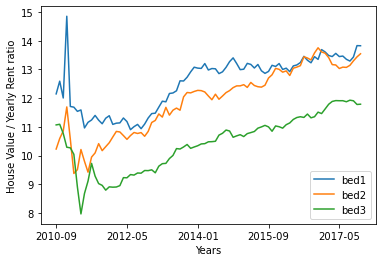

In [31]:
median_ratios_df.plot(xlabel = 'Years', ylabel = 'House Value / Yearly Rent ratio')

In [32]:
def median_values(x):
    just_ratios = x.iloc[:,7:len(x.columns)]
    median_ratio = pd.DataFrame(index = pd.Series(range(0,1)))
    for i in range(0, (len(x.columns) - 7)):
        median_ratio[0,i] = (just_ratios.iloc[:,i].median())
    median_ratio.columns = just_ratios.columns
    return median_ratio

In [33]:
bed1_median_value = median_values(bed1_value)
bed2_median_value = median_values(bed2_value)
bed3_median_value = median_values(bed3_value)

In [34]:
median_values_df = pd.concat([bed1_median_value, bed2_median_value, bed3_median_value], axis =0)
median_values_df = median_values_df.set_index([['bed1', 'bed2', 'bed3']])
median_values_df = median_values_df.transpose()
median_values_df[1:5]

,bed1,bed2,bed3
1996-05,72500.0,82850.0,103300.0
1996-06,72300.0,82800.0,103200.0
1996-07,72100.0,82850.0,103400.0
1996-08,71800.0,82700.0,103900.0


In [35]:
median_values_df[len(median_values_df) - 5: len(median_values_df)]

,bed1,bed2,bed3
2017-07,157700.0,149000.0,186200.0
2017-08,159000.0,149800.0,186900.0
2017-09,160450.0,150950.0,188000.0
2017-10,161600.0,152150.0,189400.0
2017-11,162350.0,153200.0,190300.0


<AxesSubplot:xlabel='1996 to 2017 Years', ylabel='House Value'>

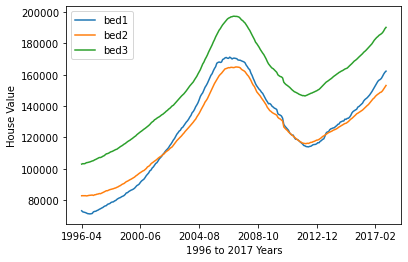

In [36]:
# Why don't we take a quick look at the housing value increases by type across the years too

median_values_df.plot(xlabel = '1996 to 2017 Years', ylabel = 'House Value')

In [37]:
# I wonder if the value/rental ratio is correlated to the size of the market 
# in stocks, it is very common for large stocks to command a valuation premium
# Lets do simple correlation (no need to overcomplicate. There are only 2 columns)

print(bed1_ratio_data['Housevalue_SizeRank'].astype(float).corr(bed1_ratio_data['2017-11'].astype(float)))
print(bed2_ratio_data['Housevalue_SizeRank'].astype(float).corr(bed2_ratio_data['2017-11'].astype(float)))
print(bed3_ratio_data['Housevalue_SizeRank'].astype(float).corr(bed3_ratio_data['2017-11'].astype(float)))

# Huh! very interesting! so, there is no valuation premium for bigger cities
# you can't just say houses in chicago are going to be valued highly relative to some small zip code in texas

-0.09267628934860864
0.060076192280230985
0.011943878703766836


In [38]:
# Or is it that I have data only for very big markets? Let me just check this

print(bed1_ratio_data['Housevalue_SizeRank'].astype(float).describe())
print(bed2_ratio_data['Housevalue_SizeRank'].astype(float).describe())
print(bed3_ratio_data['Housevalue_SizeRank'].astype(float).describe())

# We have data for markets across a broad range. I actually dropped region name columns earlier, but some of these towns with ranks in thousands have populations of barely 40,000. So clearly, this ia wide sample

count     296.000000
mean      815.165541
std       672.037446
min         1.000000
25%       218.750000
50%       689.500000
75%      1337.250000
max      2482.000000
Name: Housevalue_SizeRank, dtype: float64
count     643.000000
mean     1666.328149
std      1592.170581
min         1.000000
25%       407.000000
50%      1160.000000
75%      2543.500000
max      8282.000000
Name: Housevalue_SizeRank, dtype: float64
count      537.000000
mean      1627.603352
std       1732.934167
min          1.000000
25%        370.000000
50%        969.000000
75%       2410.000000
max      11675.000000
Name: Housevalue_SizeRank, dtype: float64


In [39]:
# The ratio is currently value/rental income monthly ratio. Need to make it house value/yearly rental income

bed1_ratio_data.iloc[:,6:93] = bed1_ratio_data.iloc[:,6:93]/12
bed2_ratio_data.iloc[:,6:93] = bed2_ratio_data.iloc[:,6:93]/12
bed3_ratio_data.iloc[:,6:93] = bed3_ratio_data.iloc[:,6:93]/12

# although statements like the above do the job, i have never been a big fan of such statements because values will change if I accidentaly run this block of code again.

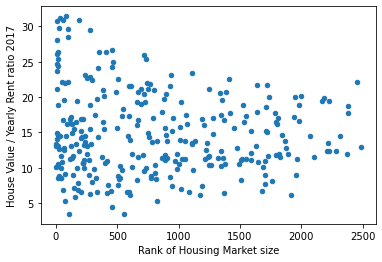

In [40]:
bed1_ratio_data.plot(x = ['Housevalue_SizeRank'], y = ['2017-11'], kind = 'scatter')
labels = 'Rank of Housing Market size'
plt.xlabel(labels)
ylabelsset = 'House Value / Yearly Rent ratio 2017'
plt.ylabel(ylabelsset)
plt.show()

# What we are seeing is that there are many cheap areas even within bigger markets. We don't have to go to some tiny town in search of relative value

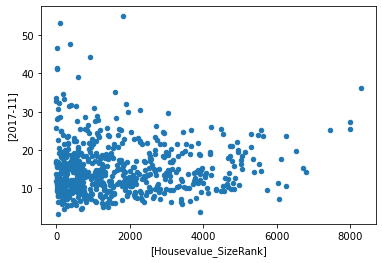

In [41]:
# Let me just do this for 2 bedroom and 3 bedroom homes

bed2_ratio_data.plot(x = ['Housevalue_SizeRank'], y = ['2017-11'], kind = 'scatter')
plt.show()

# And that's why they say "plot it". Mean or median is not everything.

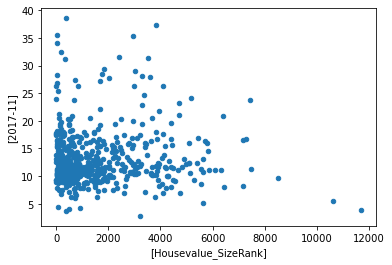

In [42]:
bed3_ratio_data.plot(x = ['Housevalue_SizeRank'], y = ['2017-11'], kind = 'scatter')
plt.show()

# The question is why are some big markets undervalued? Why are people skeptical about the future prospects for these markets?

In [43]:
# But before we attempt to answer the question above, lets try to understand if cheap markets stay cheap forever? What does historical evidence say
# But there's a problem. Although we have values from 2010 - 2017 which should be enough to study any patterns, almost all ratios values around early years are null since we don't have rental data

bed1_ratio_data.isnull().sum()

# We can see clearly that almost half of the values in 2015 are null.

RegionName    0
City          0
State         0
Metro         0
CountyName    0
             ..
2017-07       0
2017-08       0
2017-09       0
2017-10       0
2017-11       0
Length: 93, dtype: int64

In [44]:
# Fortunately, the nice people at Zillow have provided a direct Price/Rent ratio data set (not derived from their individual value, ratio data sets) for all Single family residence (SFR) homes
# We don't have data split by 1 bedroom / 2 bedroom / 3 bedroom but we have to use this data set to answer the earlier question

zillow_ratios = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Housing market\Housing_Market-master\Data\Rental income monthly\Zip_PriceToRentRatio_AllHomes.csv')

In [45]:
zillow_ratios.shape

# the data structure is very similar (93 columns)
# The only big difference is that we have a region column also but this data starts from 2010-10 not 2010-09 like individual data sets
# However, we have ratio data for 15500 markets

(15377, 91)

In [46]:
# But are there any null values in the zillow data set

zillow_ratios.isnull().sum()

# oh, god!

RegionID         0
RegionName       0
City             0
State            0
Metro         1144
              ... 
2017-05          0
2017-06          0
2017-07          0
2017-08          0
2017-09          0
Length: 91, dtype: int64

In [47]:
# If i just remove all the rows where atleast one column is null, what % of data will be lost

zillow_nonull = zillow_ratios.dropna() # That's why we love pandas. its the little things sometimes

len(zillow_nonull)*100/len(zillow_ratios)

# Huh, 83% of rows don't have any missing values

83.15015932886779

In [48]:
# Before we think about attempting any bold imputation, lets see the distribution of null values across data. Is there a pattern?

zillow_ratios2 = zillow_ratios[zillow_ratios['2010-10'].isnull()]

In [49]:
zillow_ratios2['SizeRank'].describe()

# So, we have slightly more proportion of nulls for smaller markets. But its not too much of a pattern.
# Moreover, we have seen from our earlier analysis that small market doesn't mean low ratio

count     1387.000000
mean      9665.824802
std       4031.310914
min        235.000000
25%       6578.500000
50%      10273.000000
75%      13093.000000
max      15373.000000
Name: SizeRank, dtype: float64

<AxesSubplot:xlabel='Years:2012-2017', ylabel='High & Low ratio homes'>

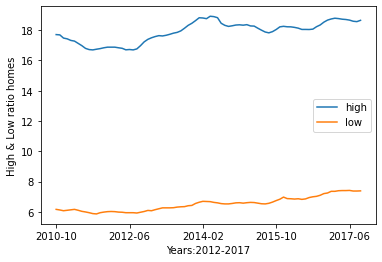

In [50]:
# Lets just work with non null data
# There are two ways i think we can effectively test the hypothesis (that undervalued markets don't stay undervalued forever)
# Method 1: lets just plot how the ratios of high ratio and low ratio markets (as of 2010) have varied across the years

percentile = 0.1

low_ratio_markets = zillow_nonull[zillow_nonull['2010-10'] < zillow_nonull['2010-10'].quantile(percentile)]
high_ratio_markets = zillow_nonull[zillow_nonull['2010-10'] > zillow_nonull['2010-10'].quantile(1 - percentile)]

def median_ratios_91_rows(x):
    just_ratios = x.iloc[:,6:91]
    median_ratio = pd.DataFrame(index = pd.Series(range(0,1)))
    for i in range(0,85):
        median_ratio[0,i] = (just_ratios.iloc[:,i].median())/12
    median_ratio.columns = just_ratios.columns
    return median_ratio

# quick note: the ratios in the zillow ratio data set are adjusted for yearly yearly. Hence, I am multiplying by 12
low_ratio_markets = low_ratio_markets.reset_index()
low_ratio_markets = low_ratio_markets.drop(['index'], axis=1)
low_medians = median_ratios_91_rows(low_ratio_markets)*12

# Also i need to drop the first column
low_medians = low_medians.drop(low_medians.columns[0], axis=1)
high_medians = median_ratios_91_rows(high_ratio_markets)*12
high_medians = high_medians.drop(high_medians.columns[0], axis=1)

# The next three lines are written using the same logic as earlier
high_low_df = pd.concat([high_medians, low_medians], axis =0)
high_low_df = high_low_df.set_index([['high', 'low']])
high_low_df = high_low_df.transpose()

# finally plotting. Once again, logic of the code is very similar to earlier plot
high_low_df.plot(xlabel = 'Years:2012-2017', ylabel = 'High & Low ratio homes')

<AxesSubplot:xlabel='Years:2010-2017', ylabel='High ratio homes across years'>

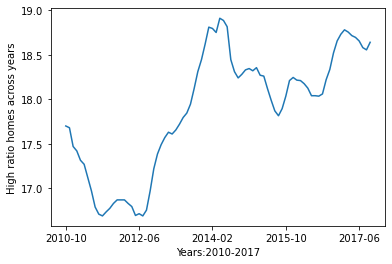

In [51]:
# Let me just plot them individually
high_low_df['high'].plot(xlabel = 'Years:2010-2017', ylabel = 'High ratio homes across years')

<AxesSubplot:xlabel='Years:2010-2017', ylabel='Low ratio homes across years'>

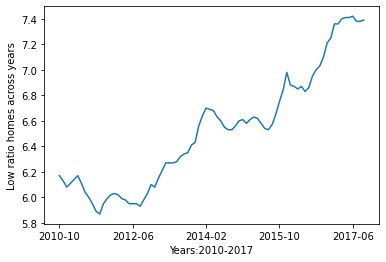

In [52]:
high_low_df['low'].plot(xlabel = 'Years:2010-2017', ylabel = 'Low ratio homes across years')

In [53]:
# Analysis box!

# Well, the data has spoken. We do see some upward trend in the markets that originally had low ratios in 2010
# But it's not as if there is some clear reversion to mean. its not as if low ratio homes got to the ratio of 12 and high ratio homes decreased to a ratio of 12
# An analogy in stock market is that Amazon, Tesla, Netflix have always been expensive stocks and continue to stay expensive
# On the other hand some stocks were undervalued 7 years ago and continue to stay undervalued

# However, it is important to note that most of these highly valued stocks have very high revenue and earnings growth
# Amazon may be posting losses but investors are patient with Amazon considering Amazon's past revenue growth and future potential

# The PEG ratio (price to earnings growth) is a very important ratio in finance. There are many other ratios, analyses in fundamental analysis.
# But broadly speaking, its not a great idea to buy a stock for a PEG > 1 (max 2 if you ask me)
 
# I mean, if the rent is increasing 17% every year in any zip code, I am sure as hell companies, people are going to move out to another zip code
# There is a reason JPM moved its entire IT team from NY to Columbus, Ohio. Many cities in Texas have benifited from a similar trend
# Rent increasing 17% year over year? impossible. Just look at the wage inflation in this country 


# Possible reasons why some zip codes have high ratios

# Investors believe rents are going to rise quickly in this area
# Investors might be speculating that a particualr residentail zone may be turning into a commercial zone in the near future
# That means destruction of old homes, building office spaces and the land on which the house is situated is very valuable
# There are REIT's that manage billions and institutional capital chasing certain markets desparately (probably big markets)
# These low ratio regions have old homes. The maintenance cost is going to eat up a large portion of rental income
# There are too many people 'settling' and buying homes in a region. you will have hard time finding tenants
# I think Detroit with high crime rate, unemployment rate of 26% has a ratio of 6. Palo Alto has a ratio of 38 with rent of 2500. Where will you buy a house?
# But the fact is people is Detroit are paying rent. I don't care how. But the market has arrived at a fair rental price

In [54]:
# Lets look at the growth in rental income for both the high income and low income zones
# Using a zillow rental income data for all single family homes (this data is different from our previously used rental data sets. They combined all types of homes into one data set. don't know the exact methodology)

zillow_rentals = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Housing market\Housing_Market-master\Data\Rental income monthly\Zip_Zri_SingleFamilyResidenceRental.csv')

In [55]:
zillow_rentals_nonull = zillow_rentals.dropna()

len(zillow_rentals_nonull)

# We have data for 12657 markets. should be more than enough

12622

In [56]:
# I will test the hypothesis in a different way this time. I should have done this last time 
# But i wanted to look at the graphs of ratios across time last time

zillow_rentals_nonull['rental_income_growth'] = zillow_rentals_nonull['2017-11']
zillow_rentals_nonull.loc[:,'rental_income_growth'] = (((zillow_rentals_nonull.loc[:, '2017-11']/zillow_rentals_nonull.loc[:, '2010-11']))**(1/7) - 1)*100

# Once again, ignore those slice warnings

In [57]:
# Time to join the ratio and rental data sets

ratio_rentals = pd.merge(zillow_nonull,
                         zillow_rentals_nonull,
                         left_on='RegionName',
                         right_on='RegionName',
                         how='inner')

ratio_rentals_2010 = ratio_rentals[['2010-10', 'rental_income_growth']]
ratio_rentals_2017 = ratio_rentals[['2010-10', '2017-09_x', 'rental_income_growth']]

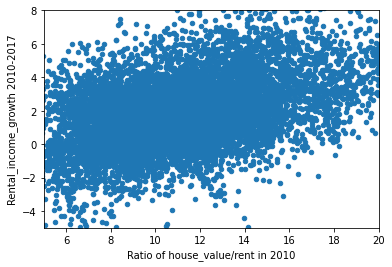

In [58]:
scatt = ratio_rentals_2010.plot(x = ['2010-10'], y = ['rental_income_growth'], kind = 'scatter')
labels = 'Ratio of house_value/rent in 2010'
plt.xlabel(labels)
ylabelsset = 'Rental_income_growth 2010-2017'
plt.ylabel(ylabelsset)
scatt.set_xlim(5, 20)
scatt.set_ylim(-5, 8)
plt.show()

# I can confirm that there is no zip code in this country that had a rental income growth of more than 10% across 7 years as expected.
# There are actually 2000 zip codes where rents decreased from Nov 2010 to Nov 2017. 
# I was so shocked I had to write out csv file and check this
# I actaully expected rents to dramatically increase since the economy came out of recession from 2010 - 2017. Not true
# Rental income cash flow is more stable than stocks! V.imp point to note
# You can actually argue that there is some relationship between ratio and future rental income increase. Very interesting
# But the question is the small rental income increase worth the high ratio you have to pay for that house?

In [59]:
ratio_rentals.columns

Index(['RegionID_x', 'RegionName', 'City_x', 'State_x', 'Metro_x',
       'CountyName_x', 'SizeRank_x', '2010-10', '2010-11_x', '2010-12_x',
       ...
       '2017-03_y', '2017-04_y', '2017-05_y', '2017-06_y', '2017-07_y',
       '2017-08_y', '2017-09_y', '2017-10', '2017-11', 'rental_income_growth'],
      dtype='object', length=183)

In [60]:
ratio_rentals['2010-10'].corr(ratio_rentals['rental_income_growth'])

0.4516755209613245

In [61]:
ratio_rentals_2017['ratio_change'] = (ratio_rentals_2017['2017-09_x'] - ratio_rentals_2017['2010-10'])*100/ratio_rentals_2017['2010-10']

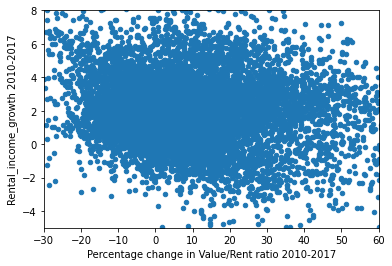

In [62]:
scatt = ratio_rentals_2017.plot(x = ['ratio_change'], y = ['rental_income_growth'], kind = 'scatter')
labels = 'Percentage change in Value/Rent ratio 2010-2017'
plt.xlabel(labels)
ylabelsset = 'Rental_income_growth 2010-2017'
plt.ylabel(ylabelsset)
scatt.set_xlim(-30, 60)
scatt.set_ylim(-5, 8)
plt.show()

# I can confirm that there is no zip code in this country that had a rental income growth of more than 10% across 7 years as expected.
# There are actually 2000 zip codes where rents decreased from Nov 2010 to Nov 2017. 
# I was so shocked I had to write out csv file and check this
# I actaully expected rents to dramatically increase since the economy came out of recession from 2010 - 2017. Not true
# Rental income cash flow is more stable than stocks! V.imp point to note
# You can actually argue that there is some relationship between ratio and future rental income increase. Very interesting
# But the question is the small rental income increase worth the high ratio you have to pay for that house?

In [63]:
# Is rent the most imp thing determing a house value? very basic question but imp

ratio_rentals_2017[0:4]

,2010-10,2017-09_x,rental_income_growth,ratio_change
0,13.27,12.84,2.057223,-3.240392
1,14.09,14.04,1.358358,-0.354862
2,8.83,9.48,-1.079298,7.361268
3,11.62,10.74,0.279637,-7.573150


In [64]:
# Factors affecting housing prices

#Interest rates
#Economic growth
#Migration 
#Unemployment levels
#Post tax income - minimum of Rent or Mortgage
#Minimum of Rent of Mortgage/ Post tax income ratio
#Percentage of residents in 23 - 33 age group
#Wealth of locals
#Current and past percentage of Rentals vs Ownership 

# In terms of modeling approach, i may choose to train on a cross section of data and use that model to test on other zip codes
# Don't have too much data across years

In [65]:
#Before, we start working with predictors data sets, lets work on the aggregte housing values data set (response variable will be pulled from this)

house_values = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Housing market\Housing_Market-master\Data\Home prices\Zip_Zhvi_AllHomes.csv')

In [66]:
# If i just remove all the rows where atleast one column is null, what % of data will be lost

columns_to_be_dropped = list(house_values.columns)[7:18]
house_values2 = house_values.drop(columns_to_be_dropped, axis=1)
house_values_nonull = house_values2.dropna() 

len(house_values_nonull)*100/len(house_values)

# Huh, 75% of rows don't have any missing values. I am just going to work with these 75% of rows

75.13548387096775

In [67]:
house_values_nonull[0:4]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1997-03,1997-04,1997-05,...,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11
1,84654,60657,Chicago,IL,Chicago,Cook,2,151100.0,153200.0,155100.0,...,319700,321000,322900,324600,325100,324300,324100,324700,324400,323500
2,84616,60614,Chicago,IL,Chicago,Cook,3,197600.0,199700.0,200500.0,...,415500,410500,400200,402000,410500,411100,408500,406900,402500,397200
3,93144,79936,El Paso,TX,El Paso,El Paso,4,73100.0,73100.0,73300.0,...,115000,114800,114700,114800,114500,114200,114200,114800,114900,114400
4,84640,60640,Chicago,IL,Chicago,Cook,5,106400.0,106800.0,106600.0,...,203800,205200,204800,204100,204400,206200,208700,210100,209500,209300


In [68]:
# V. basic and silly question. Is rent the most imp thing affecting house prices?

house_values_nonull['house_value_growth'] = house_values_nonull['2017-11']
house_values_nonull.loc[:,'house_value_growth'] = (((house_values_nonull.loc[:, '2017-11']/house_values_nonull.loc[:, '2010-11']))**(1/7) - 1)*100

# Once again, ignore those slice warnings

In [69]:
# Time to join the ratio and rental data sets

value_rent_join = pd.merge(house_values_nonull,
                           zillow_rentals_nonull,
                           left_on='RegionName',
                           right_on='RegionName',
                           how='inner')

value_rent_2010 = value_rent_join[['house_value_growth', 'rental_income_growth']]

In [70]:
value_rent_join[0:4]

,RegionID_x,RegionName,City_x,State_x,Metro_x,CountyName_x,SizeRank_x,1997-03,1997-04,1997-05,...,2017-03_y,2017-04_y,2017-05_y,2017-06_y,2017-07_y,2017-08_y,2017-09_y,2017-10_y,2017-11_y,rental_income_growth
0,84654,60657,Chicago,IL,Chicago,Cook,2,151100.0,153200.0,155100.0,...,3436,3465,3502,3545,3578,3572,3559,3525,3455,2.057223
1,84616,60614,Chicago,IL,Chicago,Cook,3,197600.0,199700.0,200500.0,...,5584,5607,5590,5585,5562,5517,5456,5383,5315,1.358358
2,93144,79936,El Paso,TX,El Paso,El Paso,4,73100.0,73100.0,73300.0,...,998,998,998,997,994,992,992,996,1001,-1.079298
3,84640,60640,Chicago,IL,Chicago,Cook,5,106400.0,106800.0,106600.0,...,2434,2446,2451,2472,2468,2464,2460,2449,2428,0.279637


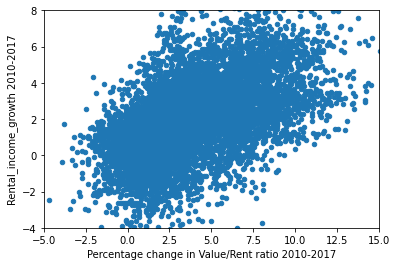

In [71]:
scatt = value_rent_join.plot(x = ['house_value_growth'], y = ['rental_income_growth'], kind = 'scatter')
labels = 'Percentage change in Value/Rent ratio 2010-2017'
plt.xlabel(labels)
ylabelsset = 'Rental_income_growth 2010-2017'
plt.ylabel(ylabelsset)
scatt.set_xlim(-5, 15)
scatt.set_ylim(-4, 8)
plt.show()

In [72]:
value_rent_join['house_value_growth'].corr(value_rent_join['rental_income_growth'])

0.5361034744882073

In [73]:
house_values_nonull[0:4]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1997-03,1997-04,1997-05,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,house_value_growth
1,84654,60657,Chicago,IL,Chicago,Cook,2,151100.0,153200.0,155100.0,...,321000,322900,324600,325100,324300,324100,324700,324400,323500,2.491894
2,84616,60614,Chicago,IL,Chicago,Cook,3,197600.0,199700.0,200500.0,...,410500,400200,402000,410500,411100,408500,406900,402500,397200,2.462830
3,93144,79936,El Paso,TX,El Paso,El Paso,4,73100.0,73100.0,73300.0,...,114800,114700,114800,114500,114200,114200,114800,114900,114400,0.214110
4,84640,60640,Chicago,IL,Chicago,Cook,5,106400.0,106800.0,106600.0,...,205200,204800,204100,204400,206200,208700,210100,209500,209300,1.384039


In [74]:
# Let me grab the zip codes that are of interest in further analysis

zip_codes_interest = house_values_nonull['RegionName'].unique()

In [75]:
# Loading in the predictors data sets
# https://fred.stlouisfed.org/series/MORTGAGE30US
mortgage_rates = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Housing market\Housing_Market-master\Data\Home prices\MORTGAGE30US.csv')

In [76]:
mortgage_rates[0:2]

,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31


In [77]:
# https://github.com/jcheng5/superzip
unemployment_levels = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Housing market\Housing_Market-master\Data\Home prices\output.csv')

In [78]:
unemployment_levels[0:2]

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4


In [79]:
# Let me load in a zip code file also
# https://github.com/jasonong/List-of-US-States
zip_county = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Housing market\Housing_Market-master\Data\Home prices\zip_codes_states.csv')

In [80]:
zip_county[0:4]

,zip_code,latitude,longitude,city,state,county
0,501,40.922326,-72.637078,Holtsville,NY,Suffolk
1,544,40.922326,-72.637078,Holtsville,NY,Suffolk
2,601,18.165273,-66.722583,Adjuntas,PR,Adjuntas
3,602,18.393103,-67.180953,Aguada,PR,Aguada


In [81]:
zip_county['key'] = zip_county['county'] + ' County'

In [82]:
zip_county = zip_county[zip_county['zip_code'].isin(zip_codes_interest)]

In [83]:
zillow_nonull[0:4]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-10,2010-11,2010-12,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
0,61639,10025,New York,NY,New York,New York,1,18.74,18.92,19.07,...,25.17,24.75,24.77,24.91,24.60,25.29,25.96,26.23,26.18,26.05
1,84654,60657,Chicago,IL,Chicago,Cook,2,13.27,13.20,13.20,...,12.85,12.99,13.07,13.12,13.11,13.04,12.88,12.82,12.80,12.84
2,84616,60614,Chicago,IL,Chicago,Cook,3,14.09,14.04,13.85,...,14.23,14.31,14.42,14.33,14.17,14.03,13.99,13.91,13.95,14.04
3,93144,79936,El Paso,TX,El Paso,El Paso,4,8.83,9.04,8.99,...,9.50,9.52,9.53,9.56,9.56,9.56,9.53,9.48,9.48,9.48


In [84]:
# Before we move on the next visualization, there's another visualization that I need to do

# does the ratio depend on state tax???? very curious

Meidan_ratio_by_state = zillow_nonull[['State', '2017-09']].groupby('State').median()

# As expected state tax rates are not the biggest thing determining ratios

In [85]:
unemployment_levels_cut = unemployment_levels[unemployment_levels['Year'] > 1995]

In [86]:
# Oh god. The states are abbrivated in one file and are in the full form in another

state_abbrevations = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Housing market\Housing_Market-master\Data\Home prices\states.csv')

In [87]:
zip_county_final = pd.merge(zip_county,
                            state_abbrevations,
                            left_on='state',
                            right_on='Abbreviation',
                            how='inner')

zip_county_final['key_final'] = zip_county_final['key'] + zip_county_final['State']
zip_county_final = zip_county_final.drop(['latitude', 'longitude', 'city', 'state', 'Abbreviation', 'State', 'county', 'key'], 
                                         axis = 1)

In [88]:
unemployment_levels_cut['key_final2'] = unemployment_levels_cut['County'] + unemployment_levels_cut['State']

In [89]:
unemployment_final = pd.merge(unemployment_levels_cut,
                              zip_county_final,
                              left_on='key_final2',
                              right_on='key_final',
                              how='right')

In [90]:
unemployment_final.shape

(2488554, 8)

In [91]:
unemployment_final[0:5]

# Yes. This is what I what

,Year,Month,State,County,Rate,key_final2,zip_code,key_final
0,2015.0,February,Massachusetts,Hampden County,7.4,Hampden CountyMassachusetts,1001,Hampden CountyMassachusetts
1,2015.0,October,Massachusetts,Hampden County,6.0,Hampden CountyMassachusetts,1001,Hampden CountyMassachusetts
2,2015.0,March,Massachusetts,Hampden County,7.0,Hampden CountyMassachusetts,1001,Hampden CountyMassachusetts
3,2015.0,August,Massachusetts,Hampden County,6.7,Hampden CountyMassachusetts,1001,Hampden CountyMassachusetts
4,2015.0,May,Massachusetts,Hampden County,6.6,Hampden CountyMassachusetts,1001,Hampden CountyMassachusetts


In [92]:
unemployment_final_yearly = unemployment_final[unemployment_final['Month'] == 'January']

In [93]:
unemployment_final_yearly = unemployment_final_yearly.drop(['Month', 'key_final2', 'key_final'], axis = 1)

In [94]:
unemployment_final_yearly['Year_final'] = unemployment_final_yearly['Year'].astype(str).str[0:4]

In [95]:
mortgage_rates['year'] = mortgage_rates['DATE'].astype(str).str[0:4]

In [96]:
mortgage_rates2 = mortgage_rates[['MORTGAGE30US', 'year']].groupby('year').median().reset_index()

In [97]:
unemployment_mortgage_rates = pd.merge(unemployment_final_yearly,
                                       mortgage_rates2,
                                       left_on='Year_final',
                                       right_on='year',
                                       how='left')

In [98]:
unemployment_final_yearly[0:2]

,Year,State,County,Rate,zip_code,Year_final
5,2015.0,Massachusetts,Hampden County,8.0,1001,2015
17,2014.0,Massachusetts,Hampden County,9.2,1001,2014


In [99]:
# Time to join GDP of the states
# https://apps.bea.gov/itable/iTable.cfm?ReqID=70&step=1
gdp = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Housing market\Housing_Market-master\Data\Home prices\GDP states edited.csv')

In [100]:
gdp[0:5]

,GeoFips,GeoName,1997-1998,1998-1999,1999-2000,2000-2001,2001-2002,2002-2003,2003-2004,2004-2005,...,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020
0,0,United States,4.5,4.8,4.1,1.0,1.7,2.9,3.8,3.5,...,1.6,2.2,1.8,2.5,3.1,1.7,2.3,3.0,2.2,-3.5
1,1000,Alabama,3.6,3.7,1.6,-0.4,2.6,2.5,6.5,3.4,...,1.4,0.5,1.2,-0.7,1.0,1.1,1.1,2.3,1.4,-2.7
2,2000,Alaska,-2.6,-1.1,-3.0,3.7,4.6,-1.8,3.8,3.0,...,0.9,5.5,-5.1,-2.3,1.0,-1.3,-0.9,0.2,0.6,-4.9
3,4000,Arizona,8.7,8.2,4.9,2.3,3.2,6.4,4.2,8.2,...,2.2,1.9,0.7,1.5,2.9,3.3,3.7,3.9,3.1,-0.9
4,5000,Arkansas,2.5,5.4,1.0,-0.2,3.2,4.0,4.6,3.5,...,2.0,0.4,2.4,1.3,1.1,0.5,1.3,1.5,0.6,-2.6


In [101]:
gdp = gdp.drop(['GeoFips'], axis = 1)

In [102]:
gdp = gdp.transpose()

In [103]:
gdp['Year'] = gdp.index

In [104]:
gdp[0:4]

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Year
GeoName,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Great Lakes,Plains,Southeast,Southwest,Rocky Mountain,Far West,NaN,NaN,NaN,GeoName
1997-1998,4.5,3.6,-2.6,8.7,2.5,6.6,9.0,2.9,9.4,1.7,...,3.5,3.1,4.7,5.9,7.2,6.0,NaN,NaN,NaN,1997-1998
1998-1999,4.8,3.7,-1.1,8.2,5.4,7.7,7.5,3.1,7.6,4.3,...,3.8,2.7,4.6,4.5,6.3,7.0,NaN,NaN,NaN,1998-1999
1999-2000,4.1,1.6,-3.0,4.9,1.0,8.0,7.7,6.9,4.3,0.8,...,2.9,4.4,2.5,3.7,6.7,6.6,NaN,NaN,NaN,1999-2000


In [105]:
gdp['Year'] = gdp['Year'].astype(str).str[0:4]

In [106]:
final_df = pd.DataFrame(None, columns=['GDP_change', 'Year', 'State'])

for i in range(0,50):
    state_data = gdp.iloc[:,i]
    state_data = pd.DataFrame(state_data)
    state_data['Year'] = state_data.index
    state_data['State'] = state_data.iloc[0,0]
    state_data = state_data[1:len(state_data)]
    state_data = state_data.reset_index()
    state_data = state_data.drop(['index'], axis = 1)
    state_data.columns = ['GDP_change', 'Year', 'State']
    state_data['Year'] = state_data['Year'].astype(str).str[0:4]
    
    
    final_df = pd.concat([final_df, state_data], ignore_index = True)

In [107]:
final_df['key_to_join'] = final_df['Year'] + final_df['State']
unemployment_mortgage_rates['key'] = unemployment_mortgage_rates['Year'].astype(str).str[0:4] + unemployment_mortgage_rates['State']

In [108]:
unemployment_mortgage_gdp = pd.merge(unemployment_mortgage_rates,
                                       final_df,
                                       left_on='key',
                                       right_on='key_to_join',
                                       how='inner')

In [109]:
unemployment_mortgage_gdp = unemployment_mortgage_gdp.drop(['Year_x', 'State_y', 'Year_final', 'Year_y', 'key', 'key_to_join', 'State_x'], axis = 1)
unemployment_mortgage_gdp.columns = ['County', 'Unemployment_rate' , 'Zip',  'Year','Mortgage_rate_30Y', 'GDP_change']

In [110]:
unemployment_mortgage_gdp.isnull().sum()

# Great. This data frame is exactly what we need

County               0
Unemployment_rate    0
Zip                  0
Year                 0
Mortgage_rate_30Y    0
GDP_change           0
dtype: int64

In [111]:
# Why don't we add ratios to the above df too? I am just gonna have to assume that the ratio across 1997 to 2010 is just the avg of ratio from 2010 to 2017

zillow_nonull_T = zillow_nonull.drop(['RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], axis = 1)
zillow_nonull_T['house_ratio'] = None

In [112]:
for i in range(0,len(zillow_nonull_T)):
    zillow_nonull_T.iloc[i,len(zillow_nonull_T.columns)-1] = zillow_nonull_T.iloc[i,1:len(zillow_nonull_T)].median()

In [113]:
zillow_nonull_T = zillow_nonull_T[['RegionName', 'house_ratio']]

In [114]:
zillow_nonull_T['RegionName'] = zillow_nonull_T['RegionName'].astype(str).str[0:5]

In [115]:
unemployment_mortgage_gdp['Zip'] = unemployment_mortgage_gdp['Zip'].astype(str).str[0:5]

In [116]:
unemployment_mortgage_gdp_ratio = pd.merge(unemployment_mortgage_gdp,
                                           zillow_nonull_T,
                                           left_on='Zip',
                                           right_on='RegionName',
                                           how='inner')

In [117]:
unemployment_mortgage_gdp_ratio[0:10]

,County,Unemployment_rate,Zip,Year,Mortgage_rate_30Y,GDP_change,RegionName,house_ratio
0,Hampden County,8.0,1001,2015,3.860,1.5,1001,10.45
1,Hampden County,9.2,1001,2014,4.140,4.0,1001,10.45
2,Hampden County,6.8,1001,2016,3.590,2.4,1001,10.45
3,Hampden County,11.2,1001,2011,4.510,2.1,1001,10.45
4,Hampden County,12.2,1001,2010,4.735,2.4,1001,10.45
5,Hampden County,10.3,1001,2013,4.115,1.7,1001,10.45
6,Hampden County,9.9,1001,2012,3.660,0.4,1001,10.45
7,Hampden County,6.0,1001,1997,7.580,4.1,1001,10.45
8,Hampden County,5.2,1001,1999,7.640,8.1,1001,10.45
9,Hampden County,5.5,1001,1998,6.940,5.5,1001,10.45


In [118]:
# Lets work with the response variable

house_values_nonull[0:5]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1997-03,1997-04,1997-05,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,house_value_growth
1,84654,60657,Chicago,IL,Chicago,Cook,2,151100.0,153200.0,155100.0,...,321000,322900,324600,325100,324300,324100,324700,324400,323500,2.491894
2,84616,60614,Chicago,IL,Chicago,Cook,3,197600.0,199700.0,200500.0,...,410500,400200,402000,410500,411100,408500,406900,402500,397200,2.462830
3,93144,79936,El Paso,TX,El Paso,El Paso,4,73100.0,73100.0,73300.0,...,114800,114700,114800,114500,114200,114200,114800,114900,114400,0.214110
4,84640,60640,Chicago,IL,Chicago,Cook,5,106400.0,106800.0,106600.0,...,205200,204800,204100,204400,206200,208700,210100,209500,209300,1.384039
6,91733,77084,Houston,TX,Houston,Harris,7,76700.0,77200.0,77800.0,...,153600,154300,156800,158500,159400,161000,162500,162900,162800,5.501981


In [119]:
part2_df = house_values_nonull.drop(['RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'RegionName'], axis = 1)

In [120]:
part2_df = part2_df.iloc[:,10::12]

In [121]:
part2_df[0:5]

,1998-01,1999-01,2000-01,2001-01,2002-01,2003-01,2004-01,2005-01,2006-01,2007-01,2008-01,2009-01,2010-01,2011-01,2012-01,2013-01,2014-01,2015-01,2016-01,2017-01
1,165600.0,183200.0,206100.0,239700.0,267100.0,285200.0,292500.0,307200.0,322300.0,318000.0,322500.0,312200.0,296200.0,273700.0,260500.0,268800.0,293000.0,307500,311000,318900
2,203800.0,228100.0,259900.0,294700.0,323200.0,332200.0,346700.0,373200.0,384600.0,386600.0,396500.0,378200.0,351200.0,337400.0,323200.0,314600.0,357900.0,367200,392400,415200
3,76200.0,75700.0,78400.0,80600.0,78700.0,79600.0,82600.0,93700.0,101700.0,127000.0,130200.0,119200.0,115400.0,113100.0,110900.0,113700.0,110800.0,111800,111300,115000
4,107900.0,122000.0,136600.0,160400.0,179600.0,197200.0,213500.0,224400.0,230800.0,237200.0,234000.0,224100.0,207400.0,186800.0,164500.0,166000.0,180300.0,191400,195500,201900
6,80600.0,86000.0,93900.0,95700.0,98300.0,104700.0,109700.0,121700.0,123200.0,127600.0,126700.0,115000.0,115200.0,111800.0,107900.0,110300.0,121600.0,135600,148800,156900


In [122]:
zips = house_values_nonull[['RegionName', '1997-03']]

In [123]:
house_values_nonull_yearly = pd.concat([zips, part2_df], axis = 1)

In [124]:
house_values_nonull_yearly2 = house_values_nonull_yearly.transpose()

In [125]:
house_values_nonull_yearly2[0:5]

,1,2,3,4,6,7,8,9,10,12,...,15479,15482,15483,15485,15488,15489,15490,15494,15497,15498
RegionName,60657.0,60614.0,79936.0,60640.0,77084.0,94109.0,75070.0,11226.0,77449.0,32162.0,...,21865.0,92341.0,29074.0,63041.0,84781.0,29915.0,12429.0,1338.0,3293.0,21405.0
1997-03,151100.0,197600.0,73100.0,106400.0,76700.0,314900.0,152200.0,170500.0,74100.0,90200.0,...,55300.0,79600.0,113700.0,59900.0,140400.0,318100.0,78600.0,96900.0,68800.0,285700.0
1998-01,165600.0,203800.0,76200.0,107900.0,80600.0,358700.0,157700.0,178900.0,77700.0,103500.0,...,62200.0,75900.0,132700.0,63000.0,143600.0,329600.0,76200.0,100300.0,72300.0,301700.0
1999-01,183200.0,228100.0,75700.0,122000.0,86000.0,415200.0,156600.0,201300.0,84900.0,111100.0,...,59500.0,81200.0,150300.0,74000.0,151300.0,395100.0,81200.0,109800.0,83900.0,322800.0
2000-01,206100.0,259900.0,78400.0,136600.0,93900.0,487900.0,170800.0,219100.0,94500.0,119700.0,...,52200.0,82800.0,155600.0,69200.0,158900.0,466600.0,83200.0,114600.0,82900.0,344400.0


In [126]:
house_values_nonull_yearly2.columns = house_values_nonull_yearly2.iloc[0,:]

In [127]:
house_values_nonull_yearly2['median_house_value'] = None

for i in range(0,len(house_values_nonull_yearly2)):
    house_values_nonull_yearly2.iloc[i,len(house_values_nonull_yearly2.columns)-1] = house_values_nonull_yearly2.iloc[i,:].median()

In [128]:
house_values_nonull_yearly2 = house_values_nonull_yearly2.iloc[1:len(house_values_nonull_yearly2), :]

In [129]:
df = pd.DataFrame(None, columns = ['Year', 'Zip', 'change'])
df2 = house_values_nonull_yearly2

for i in range(0,len(df2)-1):
    for j in range(0,len(df2.columns) - 1):
        
        a = df2.index[i]
        b = df2.columns[j]
        c = (df2.iloc[i+1,j] - df2.iloc[i,j])*100/df2.iloc[i,j]
        
        d = {'Year': [a], 'Zip': [b], 'change': [c]}
        d = pd.DataFrame(d)
        df = pd.concat([df,d])

In [130]:
df[0:5]

,Year,Zip,change
0,1997-03,60657.0,9.596294
0,1997-03,60614.0,3.137652
0,1997-03,79936.0,4.240766
0,1997-03,60640.0,1.409774
0,1997-03,77084.0,5.084746


In [131]:
df.columns = ['Year', 'Zip', 'house_price_ change']
df['Year'] = df['Year'].astype(str).str[0:4]
df['key_tojoin'] = df['Year'].astype(str) + df['Zip'].astype(str)

In [132]:
unemployment_mortgage_gdp_ratio['key'] = unemployment_mortgage_gdp_ratio['Year'].astype(str) + unemployment_mortgage_gdp_ratio['Zip'].astype(str)

In [133]:
df['key_tojoin'] = df['key_tojoin'].astype(str).str[0:9]

In [134]:
unemployment_mortgage_gdp_ratio_valuechange = pd.merge(unemployment_mortgage_gdp_ratio,
                                                 df,
                                                 left_on='key',
                                                 right_on='key_tojoin',
                                                 how='inner')

unemployment_mortgage_gdp_ratio_valuechange = unemployment_mortgage_gdp_ratio_valuechange.drop(['RegionName', 'key', 'Year_y', 'Zip_y', 'key_tojoin'], axis=1)
unemployment_mortgage_gdp_ratio_valuechange.columns = ['County', 'County_unemployment_rate', 'Zip','Year' ,'Mortgage_rate_30Y', 'State_GDP_change', 'value_ratio', 'house_price_change']

In [135]:
# Adding state back into the data

zip_state = zillow_nonull[['RegionName', 'State']].drop_duplicates()
zip_state['RegionName'] = zillow_nonull['RegionName'].astype(str)
zip_state.columns = ['Zip', 'State']

print(unemployment_mortgage_gdp_ratio_valuechange.shape)
unemployment_mortgage_gdp_ratio_valuechange = pd.merge(unemployment_mortgage_gdp_ratio_valuechange,
                                                       zip_state,
                                                       left_on = 'Zip',
                                                       right_on = 'Zip',
                                                       how = 'inner')
print(unemployment_mortgage_gdp_ratio_valuechange.shape)

(148832, 8)
(148832, 9)


In [136]:
# Adding county median % change to data

county_year_mean_df = pd.DataFrame(unemployment_mortgage_gdp_ratio_valuechange.groupby(['County', 'State', 'Year'])['house_price_change'].mean()).reset_index()
county_year_mean_df.columns = ['County', 'State', 'Year', 'County_mean_house_price_change']
county_year_mean_df['Year'] = pd.to_numeric(county_year_mean_df['Year'])
county_year_mean_df['Year'] =  county_year_mean_df['Year'] + 1
county_year_mean_df['Year'] = county_year_mean_df['Year'].astype(str)

print(unemployment_mortgage_gdp_ratio_valuechange.shape)
unemployment_mortgage_gdp_ratio_valuechange = pd.merge(unemployment_mortgage_gdp_ratio_valuechange,
                                                       county_year_mean_df,
                                                       left_on = ['County', 'State', 'Year'],
                                                       right_on = ['County', 'State', 'Year'],
                                                       how = 'left')
print(unemployment_mortgage_gdp_ratio_valuechange.shape)

(148832, 9)
(148832, 10)


In [137]:
unemployment_mortgage_gdp_ratio_valuechange['Year'] = unemployment_mortgage_gdp_ratio_valuechange['Year'].astype(int)

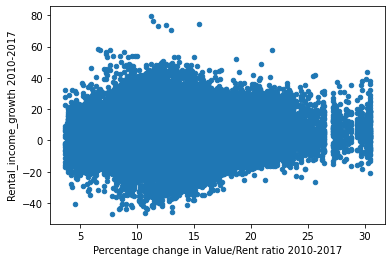

In [138]:
scatt = unemployment_mortgage_gdp_ratio_valuechange.plot(x = ['value_ratio'], y = ['house_price_change'], kind = 'scatter')
labels = 'Percentage change in Value/Rent ratio 2010-2017'
plt.xlabel(labels)
ylabelsset = 'Rental_income_growth 2010-2017'
plt.ylabel(ylabelsset)
#scatt.set_xlim(-5, 15)
#scatt.set_ylim(-4, 8)
plt.show()

### Modeling

In [139]:
# Checking nulls before starting modeling

unemployment_mortgage_gdp_ratio_valuechange[['County_unemployment_rate','Mortgage_rate_30Y', 'State_GDP_change', 'value_ratio', 
                                             'County_mean_house_price_change']].isnull().sum()

County_unemployment_rate              0
Mortgage_rate_30Y                     0
State_GDP_change                      0
value_ratio                           0
County_mean_house_price_change    10654
dtype: int64

In [140]:
# Imputing an important column 
unemployment_mortgage_gdp_ratio_valuechange['County_mean_house_price_change_imputed'] = unemployment_mortgage_gdp_ratio_valuechange['County_mean_house_price_change'].fillna(unemployment_mortgage_gdp_ratio_valuechange['County_mean_house_price_change'].median())

In [141]:
unemployment_mortgage_gdp_ratio_valuechange['State_GDP_change'] = pd.to_numeric(unemployment_mortgage_gdp_ratio_valuechange['State_GDP_change'])
unemployment_mortgage_gdp_ratio_valuechange['value_ratio'] = pd.to_numeric(unemployment_mortgage_gdp_ratio_valuechange['value_ratio'])

### Linear regression

In [142]:
selected_col = ['County_unemployment_rate', 'State_GDP_change','Mortgage_rate_30Y', 'value_ratio', 'County_mean_house_price_change_imputed']
X = unemployment_mortgage_gdp_ratio_valuechange[selected_col]
y = unemployment_mortgage_gdp_ratio_valuechange.house_price_change

In [143]:
X.corr()

,County_unemployment_rate,State_GDP_change,Mortgage_rate_30Y,value_ratio,County_mean_house_price_change_imputed
County_unemployment_rate,1.000000,0.011959,-0.403907,-0.107847,-0.374956
State_GDP_change,0.011959,1.000000,0.068079,0.170930,0.230954
Mortgage_rate_30Y,-0.403907,0.068079,1.000000,0.026836,0.255095
value_ratio,-0.107847,0.170930,0.026836,1.000000,0.144264
County_mean_house_price_change_imputed,-0.374956,0.230954,0.255095,0.144264,1.000000


In [144]:
# VIF check
pd.Series([variance_inflation_factor(X.values, i)  for i in range(X.shape[1])], index=X.columns)

County_unemployment_rate                  5.051899
State_GDP_change                          1.993245
Mortgage_rate_30Y                         8.463411
value_ratio                               8.456627
County_mean_house_price_change_imputed    1.563537
dtype: float64

In [145]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (119065, 5)
X_test:  (29767, 5)
y_train:  (119065,)
y_test:  (29767,)


In [146]:
# Linear regression code

linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

y_test_pred=linear_model.predict(X_test)
y_train_pred=linear_model.predict(X_train)

In [147]:
# Test data metrics

print("R^2: ", round(r2_score(y_test,y_test_pred), 2))
print("Adjusted R^2: ", round(1 - ( 1-linear_model.score(X_test, y_test) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ), 2))
print("RMSE: ", round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 2))
print("MAE: ", round(mean_absolute_error(y_test,y_test_pred), 2))

R^2:  0.38
Adjusted R^2:  0.38
RMSE:  6.52
MAE:  4.72


In [148]:
# Getting p values
linear_mod = sm.OLS(y_train,X_train)
fii = linear_mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
p_values

County_unemployment_rate                  1.613073e-106
State_GDP_change                           0.000000e+00
Mortgage_rate_30Y                          1.246603e-02
value_ratio                                9.550176e-62
County_mean_house_price_change_imputed     0.000000e+00
Name: P>|t|, dtype: float64

In [149]:
# Getting coefficients
coeff_df = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficients'])
print(coeff_df)

                                        Coefficients
County_unemployment_rate                   -0.215793
State_GDP_change                            0.786333
Mortgage_rate_30Y                          -0.213878
value_ratio                                 0.035421
County_mean_house_price_change_imputed      0.568043


In [150]:
# Recursive feature elimination

model = LinearRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X_train, y_train)

#print(fit.n_features_)
#print(fit.support_)
#print(fit.ranking_)

list(X_train.iloc[:, fit.support_].columns)

['County_unemployment_rate',
 'State_GDP_change',
 'Mortgage_rate_30Y',
 'value_ratio',
 'County_mean_house_price_change_imputed']

### Logistic Regression

In [151]:
# creating categorical target variable for logistic regression
unemployment_mortgage_gdp_ratio_valuechange['house_price_change_grt_5'] = np.where(unemployment_mortgage_gdp_ratio_valuechange['house_price_change'] > 5,1,0)

In [152]:
selected_col = ['County_unemployment_rate', 'State_GDP_change','Mortgage_rate_30Y', 'value_ratio', 
                'County_mean_house_price_change_imputed']
X = unemployment_mortgage_gdp_ratio_valuechange[selected_col]
y = unemployment_mortgage_gdp_ratio_valuechange.house_price_change_grt_5

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (119065, 5)
X_test:  (29767, 5)
y_train:  (119065,)
y_test:  (29767,)


In [153]:
# Building logistic regression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_test_pred = logistic_model.predict(X_test)
y_test_pred_probas = logistic_model.predict_proba(X_test)[:,1]

y_train_pred = logistic_model.predict(X_train)
y_train_pred_probas = logistic_model.predict_proba(X_train)[:,1]

In [154]:
# Confusion matrix
print(metrics.confusion_matrix(y_test, y_test_pred))

[[15380  2520]
 [ 5787  6080]]


In [155]:
# Metrics
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79     17900
           1       0.71      0.51      0.59     11867

    accuracy                           0.72     29767
   macro avg       0.72      0.69      0.69     29767
weighted avg       0.72      0.72      0.71     29767



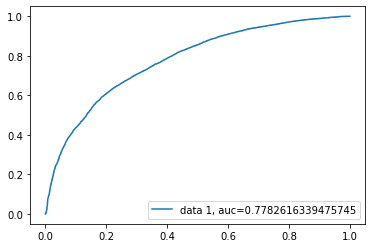

In [156]:
# ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred_probas)
auc = metrics.roc_auc_score(y_test, y_test_pred_probas)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [157]:
# Variable importance in logistic regression

var_imp = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(logistic_model.coef_).T], axis = 1)
var_imp.columns = ['var_name', 'coeff']

std_df = pd.DataFrame(np.std(X_train, 0)).reset_index()
std_df.columns = ['var_name', 'std']

var_imp = pd.merge(var_imp,
                   std_df,
                   left_on = 'var_name',
                   right_on = 'var_name',
                   how = 'left')
var_imp['coeff*std'] = var_imp['coeff']*var_imp['std']

var_imp['coeff*std_pos'] = abs(var_imp['coeff*std'])

var_imp = var_imp.sort_values(by = 'coeff*std_pos', ascending = False)
var_imp = var_imp.drop(['coeff*std_pos'], axis = 1)

var_imp['coeff'] = var_imp['coeff'].astype(str)
var_imp[0:5]

,var_name,coeff,std,coeff*std
4,County_mean_house_price_change_imputed,0.13473105684766506,7.264122,0.978703
1,State_GDP_change,0.175676372008315,2.358526,0.414337
0,County_unemployment_rate,-0.0672837400589546,2.754048,-0.185303
3,value_ratio,0.03127450832082528,3.745702,0.117145
2,Mortgage_rate_30Y,-0.03896627425567038,1.380934,-0.053810


### Random Forest

In [158]:
#from sklearn.ensemble import RandomForestRegressor
nEstimator = [140,160,180,200,220]
depth = [10,15,20,25,30]

RF = RandomForestRegressor()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)

In [159]:
selected_col = ['County_unemployment_rate', 'State_GDP_change','Mortgage_rate_30Y', 'value_ratio', 
                'County_mean_house_price_change_imputed']
X = unemployment_mortgage_gdp_ratio_valuechange[selected_col]
y = unemployment_mortgage_gdp_ratio_valuechange.house_price_change

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (119065, 5)
X_test:  (29767, 5)
y_train:  (119065,)
y_test:  (29767,)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best HyperParameter:  {'max_depth': 20, 'n_estimators': 220}
0.7332580557863054


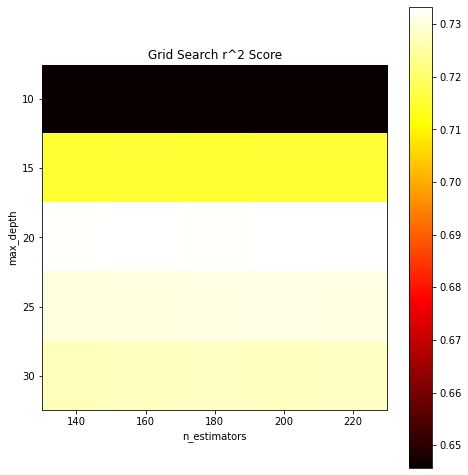

In [160]:
gsv.fit(X_train, y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))
plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(nEstimator)), nEstimator)
plt.yticks(np.arange(len(depth)), depth)
plt.title('Grid Search r^2 Score')
plt.show()
maxDepth=gsv.best_params_['max_depth']
nEstimators=gsv.best_params_['n_estimators']

In [161]:
# Random forest model
rf_model = RandomForestRegressor(n_estimators = 160, max_depth = 20, max_features = 5)
rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)

In [162]:
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_test_pred), 2))
print('Median Absolute Error:', round(metrics.median_absolute_error(y_test, y_test_pred), 2))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y_test_pred), 2))
print('Max Error:', round(metrics.max_error(y_test, y_test_pred), 2))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_test_pred), 2))
print('Root Mean Squared Error (RMSE):', round(metrics.mean_squared_error(y_test, y_test_pred, squared=False), 2))
print('R^2:', round(metrics.r2_score(y_test, y_test_pred), 2))
print('Explained Variance Score:', round(metrics.explained_variance_score(y_test, y_test_pred), 2))

Mean Absolute Error (MAE): 2.95
Median Absolute Error: 2.11
Mean Absolute Percentage Error (MAPE): 58659322188566.9
Max Error: 53.33
Mean Squared Error (MSE): 17.52
Root Mean Squared Error (RMSE): 4.19
R^2: 0.75
Explained Variance Score: 0.75


In [163]:
rf_var_imp = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(rf_model.feature_importances_)], axis = 1)
rf_var_imp.columns = ['var_name', '% imp']
rf_var_imp['% imp'] = rf_var_imp['% imp']*100
rf_var_imp = rf_var_imp.sort_values(by = ['% imp'], ascending = False)
rf_var_imp

,var_name,% imp
4,County_mean_house_price_change_imputed,44.986393
2,Mortgage_rate_30Y,15.854135
3,value_ratio,15.286259
1,State_GDP_change,14.891073
0,County_unemployment_rate,8.982140


### SVR

In [164]:
# For SVR, before doing grid search, need to scale the data

X_train_scaled = preprocessing.scale(X_train)
y_train_scaled = preprocessing.scale(y_train) 
# Scaling target variable as well because there is a lot of variance in target variable too
# There are lot of video with 10 likes, 20 likes and there's video with 60,000 likes

X_test_scaled = preprocessing.scale(X_test)
y_test_scaled = preprocessing.scale(y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best HyperParameter:  {'C': 5, 'gamma': 1}
0.6323662949676777


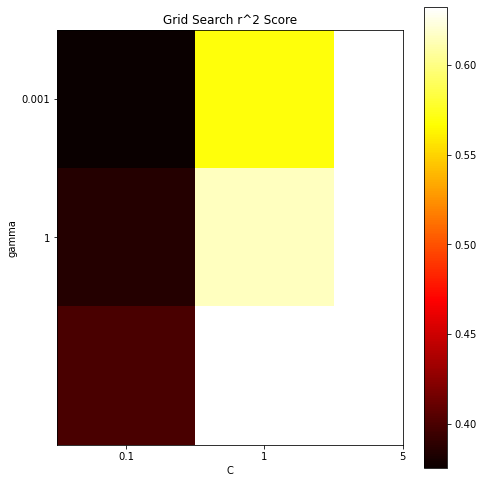

In [165]:
C_array = [0.1, 1, 5]
gamma = [0.001, 1]

svr_model = SVR()
hyperParam = [{'C':C_array,'gamma': gamma}]
gsv = GridSearchCV(svr_model,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)

gsv.fit(X_train_scaled, y_train_scaled)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(C_array),len(gamma))
plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('C')
plt.ylabel('gamma')
plt.colorbar()
plt.xticks(np.arange(len(C_array)), C_array)
plt.yticks(np.arange(len(gamma)), gamma)
plt.title('Grid Search r^2 Score')
plt.show()
gamma_para=gsv.best_params_['gamma']
C_para = gsv.best_params_['C']

In [166]:
# Support Vector Machine

svm_model = SVR(kernel='linear', C=5,gamma=0.001)

svm_model.fit(X_train_scaled, y_train_scaled)

# make predictions
y_test_pred_scaled = svm_model.predict(X_test_scaled)
y_train_pred_scaled = svm_model.predict(X_train_scaled)

In [167]:
print('R^2:', round(metrics.r2_score(y_test_scaled, y_test_pred_scaled), 2))
print('Explained Variance Score:', round(metrics.explained_variance_score(y_test_scaled, y_test_pred_scaled), 2))

R^2: 0.38
Explained Variance Score: 0.38


### SVC

In [168]:
selected_col = ['County_unemployment_rate', 'State_GDP_change','Mortgage_rate_30Y', 'value_ratio', 
                'County_mean_house_price_change_imputed']
X = unemployment_mortgage_gdp_ratio_valuechange[selected_col]
y = unemployment_mortgage_gdp_ratio_valuechange.house_price_change_grt_5

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)


# Scaling X_train & X_test
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

X_train:  (119065, 5)
X_test:  (29767, 5)
y_train:  (119065,)
y_test:  (29767,)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best HyperParameter:  {'C': 5, 'gamma': 1}
0.8314807880772059


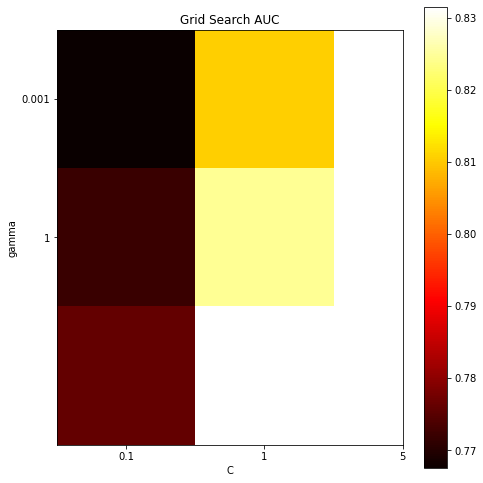

In [169]:
C_array = [0.1, 1, 5]
gamma = [0.001, 1]

svc_model = SVC()
hyperParam = [{'C':C_array,'gamma': gamma}]
gsv = GridSearchCV(svc_model,hyperParam,cv=5,verbose=1,scoring='roc_auc',n_jobs=-1)

gsv.fit(X_train_scaled, y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(C_array),len(gamma))
plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('C')
plt.ylabel('gamma')
plt.colorbar()
plt.xticks(np.arange(len(C_array)), C_array)
plt.yticks(np.arange(len(gamma)), gamma)
plt.title('Grid Search AUC')
plt.show()
gamma_para=gsv.best_params_['gamma']
C_para = gsv.best_params_['C']

In [170]:
# Building SVC model

svc_model = SVC(C = 5, gamma = 1, probability = True, kernel = 'linear')
svc_model.fit(X_train_scaled, y_train)

y_test_pred = svc_model.predict(X_test_scaled)
y_test_pred_probas = svc_model.predict_proba(X_test_scaled)[:,1]

y_train_pred = svc_model.predict(X_train_scaled)
y_train_pred_probas = svc_model.predict_proba(X_train_scaled)[:,1]

In [171]:
# Confusion matrix
print(metrics.confusion_matrix(y_test, y_test_pred))

[[16019  1881]
 [ 6425  5442]]


In [172]:
Bodhankar# Metrics
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79     17900
           1       0.74      0.46      0.57     11867

    accuracy                           0.72     29767
   macro avg       0.73      0.68      0.68     29767
weighted avg       0.73      0.72      0.70     29767



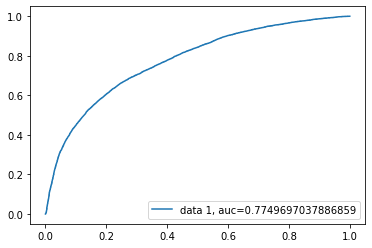

In [173]:
# ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred_probas)
auc = metrics.roc_auc_score(y_test, y_test_pred_probas)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [174]:
# Variable importance in SVM

var_imp = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(svc_model.coef_).T], axis = 1)
var_imp.columns = ['var_name', 'coeff']
var_imp['coeff_pos'] = abs(var_imp['coeff'])
var_imp = var_imp.sort_values(by = 'coeff_pos', ascending = False)
var_imp = var_imp.drop(['coeff_pos'], axis = 1)

var_imp['coeff'] = var_imp['coeff'].astype(str)
var_imp[0:5]

,var_name,coeff
4,County_mean_house_price_change_imputed,0.9291111228558293
1,State_GDP_change,0.3109594810048293
3,value_ratio,0.2466619233880465
2,Mortgage_rate_30Y,-0.09261085365687904
0,County_unemployment_rate,-0.08706195362174185
